# Backtrack

In this example we investigate the effect of different dynamic topography models on the paleo-water depths at an oceanic drill site location.

Backtracking provides a model of tectonic subsidence that includes the effects of dynamic topography. And this tectonic subsidence model, along with decompacted sediment thickness, results in paleo water depths over time.


## Reference

The following paper covers the theory and algorithms of pyBacktrack:

* Müller, R. D., Cannon, J., Williams, S. and Dutkiewicz, A., 2018,
  PyBacktrack 1.0: A Tool for Reconstructing Paleobathymetry on Oceanic and Continental Crust,
  **Geochemistry, Geophysics, Geosystems,** 19, 1898-1909, doi: [10.1029/2017GC007313](https://doi.org/10.1029/2017GC007313)

## Calculate paleo-water depths

First we use `pybacktrack` to calculate the paleo-water depths for all built-in dynamic topography models (see http://portal.gplates.org/portal/dt/) and also with no dynamic topography model.

Here we use the [pybacktrack.backtrack_well](https://pybacktrack.readthedocs.io/en/latest/pybacktrack_reference.html#pybacktrack.backtrack_well) function to find the water depth for each age in a well site. It returns a list of [pybacktrack.DecompactedWell](https://pybacktrack.readthedocs.io/en/latest/pybacktrack_reference.html#pybacktrack.DecompactedWell) and from each one we can extract an age and a paleo-water depth.

Note that each [pybacktrack.DecompactedWell](https://pybacktrack.readthedocs.io/en/latest/pybacktrack_reference.html#pybacktrack.DecompactedWell) represents the stratigraphic section of the well when it is decompacted at a particular time (the time of one of its stratigraphic units).

In [1]:
import pybacktrack

# The ocean drill site file (specifying depths/ages/lithologies of its stratigraphic layers).
well_filename = '../test_data/ODP-114-699-Lithology.txt'

# All the dynamic topography models currently built into pyBacktrack.
# We use None for the single case where no dynamic topography model is used.
dynamic_topography_models = [
    None, 'terra', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'ngrand', 's20rts', 'smean', 'AY18', 'KM16', 'D10_gmcm9']

# Create a "water-depth vs age" curve for each dynamic topography model.
paleo_water_depth_models = []
for dynamic_topography_model in dynamic_topography_models:
    # Find the water depth for each age in the well site.
    well, decompacted_sections = pybacktrack.backtrack_well(
        well_filename,
        dynamic_topography_model=dynamic_topography_model)
    
    # 'decompacted_sections' is a list of pybacktrack.DecompactedWell.
    # Each decompacted section is a single pybacktrack.DecompactedWell that represents
    # the stratigraphic section of the well when it is decompacted at a particular time
    # (the time of one of its stratigraphic units).
    #
    # Extract the age and water depth from each decompacted section in the list.
    ages = [decompacted_section.get_age()
            for decompacted_section in decompacted_sections]
    water_depths = [
        decompacted_section.get_water_depth()
            for decompacted_section in decompacted_sections]
    
    paleo_water_depth_models.append((ages, water_depths))
    

## Plot paleo-water depths

Next we plot a "water-depth vs age" curve for each dynamic topography model.

The extra-wide grey line represents *no* dynamic topography model (for comparison).

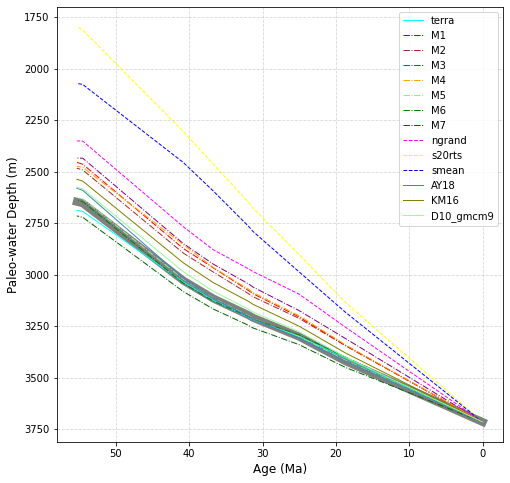

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

# Choose a colour for each dynamic topography model.
# We reserve grey for *no* model.
model_colours = [
    'grey', 'cyan', 'purple', 'brown', 'red', 'orange', 'lightgreen', 'green', 'darkgreen',
    'magenta', 'yellow', 'blue', 'steelblue', 'olive', 'palegreen']
line_styles = [
    '-', '-', '-.', '-.', '-.', '-.', '-.', '-.', '-.', '--', '--', '--', '-', '-', '-'
]

fig = plt.figure(figsize=(8,8))

# Iterate over the paleo-water depth results calculated in the previous code block.
for model_index in range(len(dynamic_topography_models)):
    # There is one set of ages and one set of paleo-water depths for each dynamic topography model.
    ages, water_depths = paleo_water_depth_models[model_index]
    
    # Plot the "water-depth vs age" curve for the *current* dynamic topography model.
    plt.plot(
        ages,
        water_depths,
        color=model_colours[model_index],
        label=dynamic_topography_models[model_index],
        linestyle=line_styles[model_index],
        # Use a wide line for the grey line representing *no* dynamic topography model.
        linewidth=1.0 if dynamic_topography_models[model_index] else 8.0)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.ylabel('Paleo-water Depth (m)', fontsize=12)
plt.xlabel('Age (Ma)', fontsize=12)
plt.grid(linestyle='--',alpha=0.5)

plt.legend(fontsize=10)

plt.show()